# Top 100 Non-Google Domains

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import glob

from datetime import datetime

%matplotlib inline

plt.style.use('seaborn-whitegrid')

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Domains with the term `google` appear often in the Alexa ranking top lists. In this notebook, we look at the other domains. We use this [script](https://github.com/sheikhomar/mako/blob/master/src/data/spark/top_non_google_domains.py) to filter the top 100 non-google domains in the crawled data set.

In [2]:
paths = glob.glob('../data/external/alexa1m-rankings-top-100-part-*')
column_names = ['domain', 'alexa_rank', 'rank', 'date']
df = pd.concat((pd.read_csv(path, names=column_names) for path in paths))

# Convert date column to the correct datetype
df['date'] = df['date'].apply(lambda val: datetime.strptime(str(val), '%Y%m%d')).astype('O')

# Show the first 5 rows
df.head()

,domain,alexa_rank,rank,date
0,facebook.com,2,1,2016-01-15 00:00:00
1,youtube.com,3,2,2016-01-15 00:00:00
2,baidu.com,4,3,2016-01-15 00:00:00
3,yahoo.com,5,4,2016-01-15 00:00:00
4,amazon.com,6,5,2016-01-15 00:00:00


How many rows do we have?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68175 entries, 0 to 34036
Data columns (total 4 columns):
domain        68175 non-null object
alexa_rank    68175 non-null int64
rank          68175 non-null int64
date          68175 non-null object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


Define a function that can visualise selected domains' ranking over time.

In [4]:
def draw_plot(df, domains):
    fig, ax = plt.subplots(figsize=(20, 10))

    date_col = df['date']

    for domain in domains:
        filtered_df = df[(df['domain'] == domain)]
        ax.plot(filtered_df['date'], filtered_df['alexa_rank'], label=domain)

    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    weeks = mdates.WeekdayLocator() # every week
    yearsFmt = mdates.DateFormatter('%Y')
    monthsFmt = mdates.DateFormatter('%Y-%m')

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsFmt)
    ax.xaxis.set_minor_locator(weeks)


    datemin = datetime(date_col.min().year, 1, 1)
    datemax = datetime(date_col.max().year + 1, 1, 1)
    #ax.set_xlim(datemin, datemax)

    ax.grid(True)
    ax.legend(loc=0, frameon=True, framealpha=1, borderpad=1)

    ax.set_ylabel('Alexa Rank')
    ax.set_xlabel('Time')
    ax.invert_yaxis()


    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

First, let us plot the top 5 domains on the first day

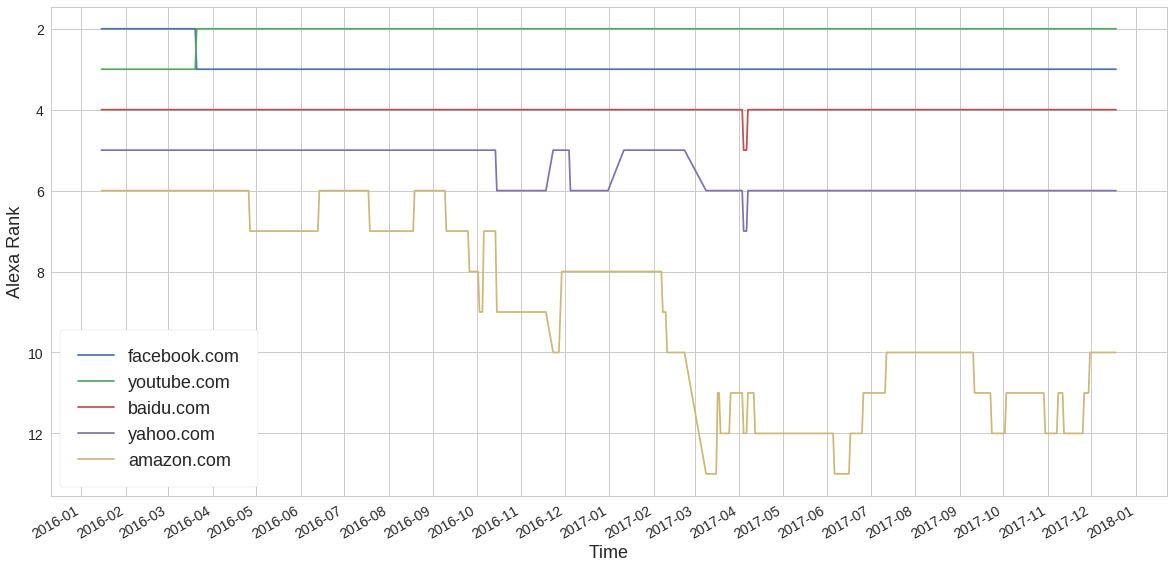

In [5]:
earliest_date = df['date'].min()
top_domains_first_day = df[df['date'] == earliest_date]['domain'].unique()
draw_plot(df, top_domains_first_day[:5])

Not really interesting. Their rankings remain stable throughout the period. Let us plot domains used by major news corporations.

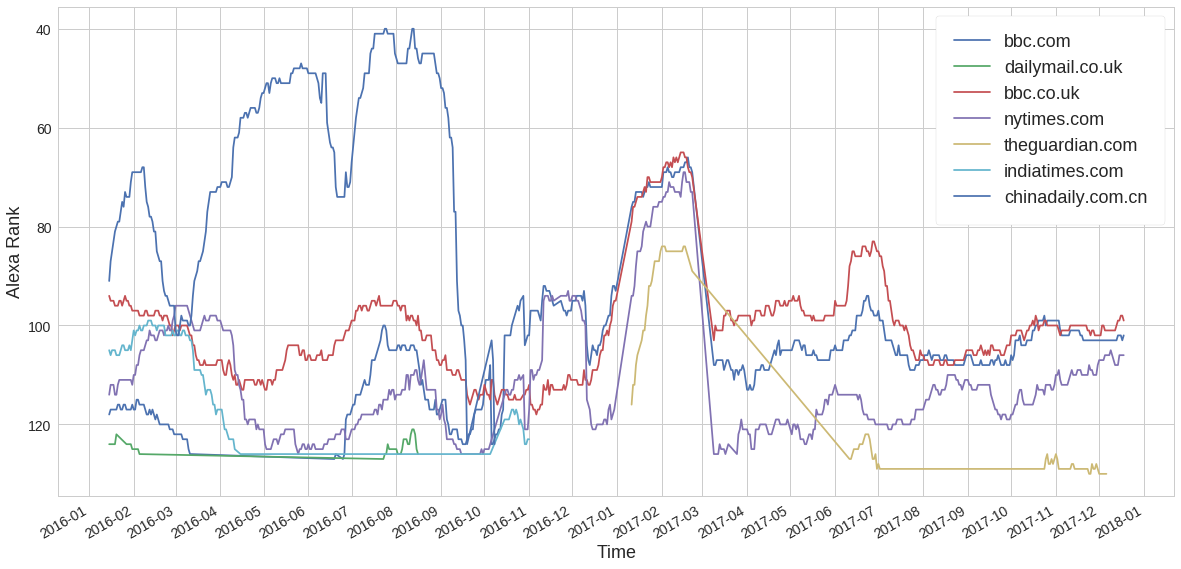

In [6]:
domains = ['bbc.com', 'dailymail.co.uk', 'bbc.co.uk', 'nytimes.com', 'theguardian.com', 'indiatimes.com', 'chinadaily.com.cn']
draw_plot(df, domains)

What about video sites?

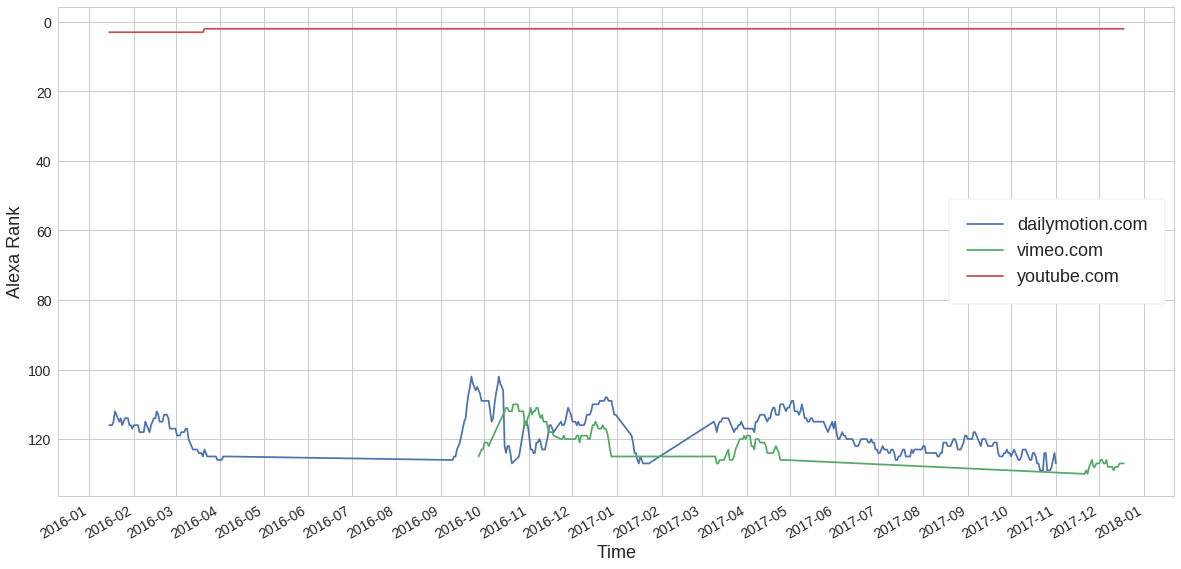

In [7]:
domains = ['dailymotion.com', 'vimeo.com', 'youtube.com']
draw_plot(df, domains)